<a href="https://colab.research.google.com/github/prishabhatia20/DSA/blob/main/Prisha_ML24_Assignment1_ModelEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Machine Learning Applications, Evaluations, and People
# Assignment 1 (the last part) - Key Metrics for Assessing Classifiers
This notebook introduces important model evaluation metrics to summarized the types of mistakes and success of a classification model.
We will build on this code for the next assignment.

## Can Food Models have Bias?
### _An evaluation of the impact of data on model performance_

Model performance can vary significantly with different groups or types of data, especially if a model has high bias. Models have bias in part because training data has bias, and training data has bias because people curate training data. A prerequisite to evaluating model bias is understanding how your model performs on different types of data. To achieve a comprehensive understanding of model performance, you can use established evaluation metrics. In this module, you will learn what those metrics are, how they work, and how to interpret them.

<img src="https://raw.githubusercontent.com/olinml2024/machine_learning_a2/main/images/model_bias.png" alt="drawing"/>


## The Scenario
  You are the head of the R&D department at Pie-thagoras Labs, a new FoodTech start-up that is aimed at helping members of the visually impaired and blind community in different food-related situations. The first products you are making are two is an image-based dessert classifiers that enables users to obtain detailed information about foods in front of them by simply taking a picture.

Product 1: Cake or not cake. (this is a binary classifier)

Product 2: Dessert type of 20+ dessert types (this is a multi-class classifier)

You can read [this paper](https://www.jsr.org/hs/index.php/path/article/view/2341) if you are interested in diving deeper into image-based food classifiers).

We are going to start with metrics for Product 1, and then for Product 2. In the next assignment, you'll evaluate multiple models for Product 2.


## Metrics Overview
Before being able to evaluate your employees' models, you need to implement metrics that help you quantitatively assess the results of each model. The metrics you will implement in this assignment are:

* Confusion Matrix
* Classification Accuracy
* Precision
* Recall

**_Consult_** **_[this article](https://arxiv.org/abs/2008.05756)_** **_to_** **_learn_** **_about_** **_the_** **_metrics_** **_and_** **_inform_** **_your_** **_implementation_**. You may need to click the View PDF button on the right.

# Confusion Matrix

According to the article above, "the confusion matrix is a cross table that records the number of occurrences between two raters, the true/actual classification and the predicted classification" (Grandini et al., 2).

Before we dive deeper, we need to import the libraries we are going to use to create the confusion matrix:

In [85]:
# Matplotlib inline allows us to interact with plots, via zooming, etc.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Product 1: Cake or not cake? - The Binary Confusion Matrix
We are going to start with a simple version of this, using some fake results from a fake model, based on the TV show Is it Cake?

<img src="https://media.giphy.com/media/9gF8CnpjfrOSaPu2Wx/giphy.gif" alt="is it cake"/>


The classifier (or in the case of the show, a human acting as a classifier) looks at an object and makes a prediction about if it is cake or not. So if it's cake, that's a "positive" response, which is marked as a 1.

Alternatively, we can think of this as two classes:
* not cake (class 0)
* cake (class 1)

In the land of binary classification (yes/no, 1/0) it doesn't matter, but it will become important for multi-class situations and it's always important to pay attention to what your labels are telling you.

Here, we are using a very small amount of data so that you can easily count to check that things are working properly.

In [86]:
cake_labels = ["not cake", "cake"] #not cake is 0, cake is 1
cake_predictions = [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
cake_ground_truth_labels = [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]

In [87]:
print(cake_predictions)
print(cake_ground_truth_labels)

[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]


### Binary Confusion Matrix

First we are going to introduce how binary classification works.

A binary confusion matrix looks like this:

<img src="https://raw.githubusercontent.com/olinml2024/machine_learning_a2/main/images/binary_class.png" alt="drawing"/>

Where the prediction is either part of the class or not. It's pretty straightforward.

A **positive** prediction indicates that the model thinks the image is a member of the class.

A **negative** prediction indicates that the model thinks the image is not part of the class.

The confusion matrix then pairs the predictions with their ground truth labels, or the actual classes the images belong to/the labels they actually have. Using this information, we can see how accurate the model is.

Here are the basic metrics a binary confusion matrix can tell you:


#### Number of True Positives (TP):
A true positive is a member of the class and is classified as a member of the class. An example is a picture of a dog being classified as a dog.

#### Number of False Positives (FP):
In this instance, a false positive means a picture that is not part of the class is labeled as a member of the class. An example would be cat labeled as dog if the classifier only answered the question, "Is this a dog or not?"

#### Number of True Negatives (TN):
This is not a member of the class, and the prediction agrees with that. An example of this is a cat being labeled as not a dog.

#### Number of False Negatives (FN):
A false negative is a image that is part of the class, but is labeled as not part of the class. An example is a dog being classified as not a dog.

###Exercise 1: Manual Binary Confusion matrix
Count the values above and make a confusion matrix on paper. No need to submit this, but it will be useful to help prevent confusion matrix confusion.


###Exercise 2: Binary confusion matrix
Create a confusion matrix. We suggest writing this for the situation of multiple classes (e.g., the Product 2 example where you'll have labels of multiple class 0, 1, 2, 3, 4, etc). However, if that's hard to wrap your head around right now, start with just the binary classifier. In a later exercise, you'll revise this code to deal with multiple classes.

We strongly suggest that your confusion matrix starts with class 0 in the first row and column (this will make it easier to expand to the multi-class version). We provide code below to flip the axes in the plot to make it look like a binary confusion matrix shown in the examples above.

In [88]:
## Really, this is all about creating boxes and incrementing the numbers that go into each box
# Please note that you can also do this using numpy arrays and logicals.
def calculate_confusion_matrix(predictions, gt_labels, num_classes):
    # Initialize the confusion matrix with zeros
    # The matrix is a 2D list where rows represent the true classes/labels and columns represent the predicted classes/labels
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    # Iterate over the pairs of predictions and ground truth labels
    for pred, true in zip(predictions, gt_labels):
        # Increment the appropriate cell in the confusion matrix
        # The cell at [true][pred] should be incremented since 'true' is the true class, and 'pred' is the predicted class
        # TODO: Write code here to update the confusion matrix
        if (pred == true):
          if (pred == 1):
            confusion_matrix[1][1] += 1
          else:
            confusion_matrix[0][0] += 1
        elif (pred > true):
          confusion_matrix[0][1] += 1
        else:
          confusion_matrix[1][0] += 1

    # Return the populated confusion matrix
    return confusion_matrix

In [89]:
# # @title Answer
# #Note: you can also do this with numpy arrays instead of loops
# def calculate_confusion_matrix(predictions, gt_labels, num_classes):
#     # Initialize the confusion matrix with zeros
#     confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

#     # Populate the confusion matrix
#     for pred, true in zip(predictions, gt_labels):
#         confusion_matrix[true][pred] += 1

#     return confusion_matrix

###Now display your confusion matrix.

Confirm that everything is as you expect based on your written version.  If not, fix it.


Confusion Matrix (starts at category 0):
[4, 3]
[2, 5]


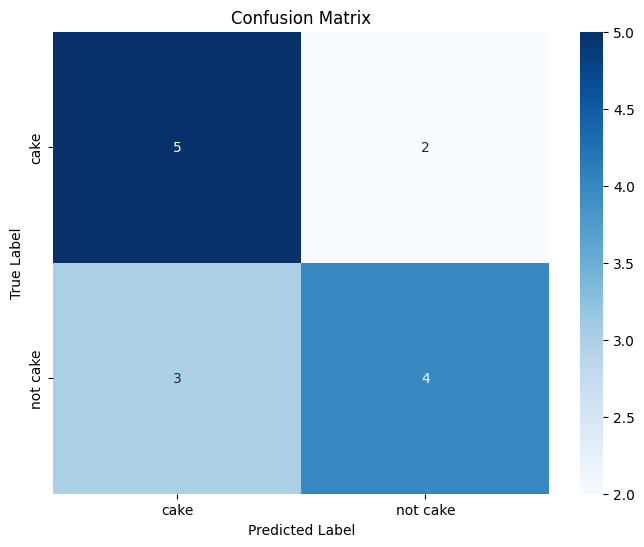

In [90]:
cake_num_classes = 2

# Calculate the confusion matrix
cake_cm = calculate_confusion_matrix(cake_predictions, cake_ground_truth_labels, cake_num_classes)

# Print the confusion matrix (note that this starts at category 0 and counts up)
print("Confusion Matrix (starts at category 0):")
for row in cake_cm:
    print(row)


# Plotting the confusion matrix (switching the label order to match a classic binary confusion matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(cake_cm, annot=True, fmt='d', cmap='Blues', xticklabels=cake_labels, yticklabels=cake_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Inverting the axes to match the label order
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

##Product 2: Dessert Classifier: Multi-class confusion matrix

Now that you have this working for the binary case, check that it works for a multi-class problem.  

In the early days of Pie-thagoras Labs, your first employees created a proof-of-concept model to classify 23 dessert types based on images. In the next assignment we'll be diving into a detailed analysis of the company's more advanced models, but for now, we'll just load in the results of this first model.

In [91]:
# Json helps us work with json file formats
import json
from collections import defaultdict
# Clone the place where the model results are stored
!git clone https://github.com/olinml2024/machine_learning_a2
%cd machine_learning_a2

Cloning into 'machine_learning_a2'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 175 (delta 54), reused 46 (delta 24), pack-reused 73 (from 1)
Receiving objects: 100% (175/175), 93.15 MiB | 11.14 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Updating files: 100% (28/28), done.
/content/machine_learning_a2/machine_learning_a2


In [92]:
# Load the json file
with open("model_testing/results/model0.json", "r") as file:
    data = json.load(file)

# Retrieve class mappings
dessert_class_indices = data["class_indices"]
# Retrieve predictions
dessert_predictions = [x["prediction_idx"] for x in data["predictions_and_labels"]]
# Retrieve ground truth labels
dessert_gt_labels = [x["gt_idx"] for x in data["predictions_and_labels"]]
dessert_num_classes = len(dessert_class_indices)

Because we haven't worked with multi-class models yet, we wanted to show you what the predictions and ground truth/actual labels look like. Each of these numbers maps to a particular dessert class, of which there are 23. The class indexing starts at 0.  

In [93]:
print(dessert_class_indices)
print(dessert_predictions)
print(dessert_gt_labels)
print(dessert_num_classes)

{'apple_pie': 0, 'baklava': 1, 'beignets': 2, 'bread_pudding': 3, 'cannoli': 4, 'carrot_cake': 5, 'cheesecake': 6, 'chocolate_cake': 7, 'chocolate_mousse': 8, 'churros': 9, 'creme_brulee': 10, 'croque_madame': 11, 'cup_cakes': 12, 'donuts': 13, 'french_toast': 14, 'frozen_yogurt': 15, 'ice_cream': 16, 'macarons': 17, 'pancakes': 18, 'red_velvet_cake': 19, 'strawberry_shortcake': 20, 'tiramisu': 21, 'waffles': 22}
[5, 13, 20, 21, 21, 21, 11, 20, 20, 21, 21, 15, 7, 3, 21, 21, 21, 21, 1, 5, 5, 9, 17, 21, 19, 7, 21, 14, 7, 0, 21, 8, 21, 5, 17, 20, 19, 21, 21, 21, 8, 21, 21, 4, 19, 21, 1, 11, 19, 21, 6, 19, 19, 21, 3, 21, 0, 5, 21, 21, 7, 20, 21, 21, 7, 21, 7, 6, 21, 5, 21, 19, 7, 12, 21, 20, 21, 21, 21, 12, 21, 18, 21, 21, 21, 21, 21, 21, 5, 21, 21, 7, 21, 21, 10, 21, 2, 7, 21, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 3, 9, 9, 13, 9, 7, 9, 9, 9, 9, 9, 14, 9, 9, 21, 9, 9, 9, 9, 4, 9, 9, 9, 20, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 22, 5, 9, 9, 9, 9, 22, 9, 9, 9, 9, 9, 9, 9, 9, 9, 19, 9, 9

Whose hungry?

###Exercise 3: Display the confusion matrix for the dessert classifier.

Note: You don't need to invert the axes on your plot for the multi-class version.

If your orginal calculate_confusion_matrix function doesn't, go back and revise your code above to work for the multi-class situation as well. (Make sure it still works for the binary).

In [94]:
# Put your code here (this will be similar to the binary example)

def calculate_dessert_confusion_matrix(dessert_predictions, dessert_gt_labels, dessert_num_classes):
    dessert_confusion_matrix = [[0 for _ in range(dessert_num_classes)] for _ in range(dessert_num_classes)]

    for pred, true in zip(dessert_predictions, dessert_gt_labels):
        dessert_confusion_matrix[pred][true] += 1

    return dessert_confusion_matrix


Confusion Matrix (starts at category 0):
[34, 12, 1, 6, 2, 5, 0, 1, 0, 0, 0, 2, 2, 2, 6, 0, 4, 0, 4, 1, 3, 2, 3]
[6, 60, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 4, 0, 0, 0, 0, 0, 0, 2, 0]
[4, 3, 83, 1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 8, 7, 0, 2, 2, 7, 3, 2, 1, 0]
[15, 3, 2, 63, 3, 4, 6, 3, 8, 1, 5, 4, 1, 0, 9, 5, 11, 0, 6, 0, 11, 2, 4]
[5, 2, 2, 1, 69, 1, 3, 0, 0, 3, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 1]
[3, 4, 1, 5, 1, 57, 3, 10, 6, 1, 0, 1, 3, 0, 2, 1, 1, 1, 1, 22, 2, 7, 1]
[1, 1, 1, 1, 1, 2, 41, 7, 5, 0, 1, 1, 1, 1, 0, 0, 1, 0, 3, 1, 4, 2, 1]
[2, 1, 0, 4, 2, 7, 9, 52, 19, 1, 1, 1, 2, 3, 0, 0, 1, 0, 2, 5, 0, 10, 2]
[1, 1, 1, 0, 0, 0, 4, 6, 28, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0]
[0, 0, 2, 0, 4, 0, 1, 1, 4, 83, 2, 1, 1, 3, 5, 4, 3, 0, 0, 5, 3, 1, 0]
[0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 76, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1]
[0, 5, 0, 1, 0, 0, 1, 0, 0, 0, 0, 81, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 62, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0]
[0, 1, 0, 1, 0, 0, 2, 4, 1, 

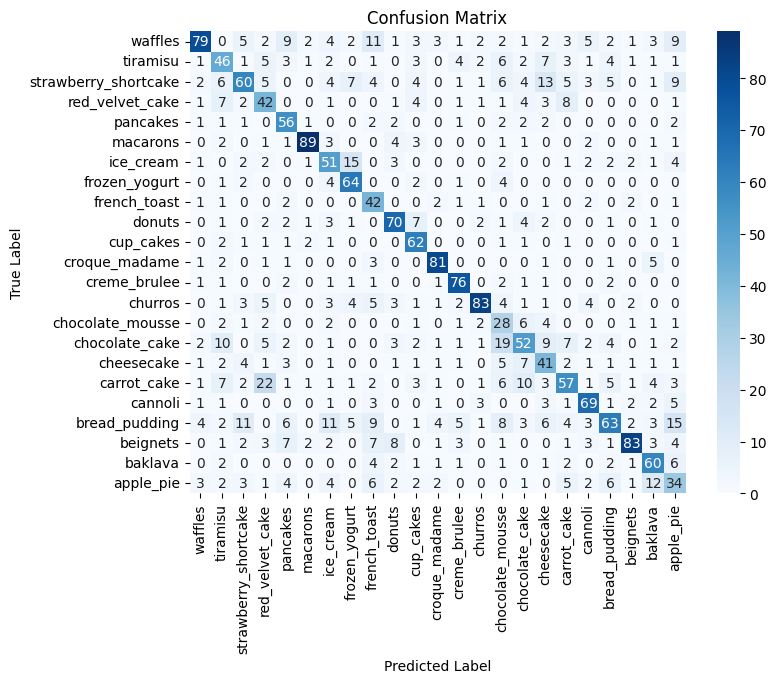

In [95]:

dessert_cm = calculate_dessert_confusion_matrix(dessert_predictions, dessert_gt_labels, dessert_num_classes)

# Print the confusion matrix (note that this starts at category 0 and counts up)
print("Confusion Matrix (starts at category 0):")
for row in dessert_cm:
    print(row)


# Plotting the confusion matrix (switching the label order to match a classic binary confusion matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(dessert_cm, annot=True, fmt='d', cmap='Blues', xticklabels=dessert_class_indices, yticklabels=dessert_class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Inverting the axes to match the label order
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [96]:
#@title Answer
# # Calculate the confusion matrix
# dessert_cm = calculate_confusion_matrix(dessert_predictions, dessert_gt_labels, dessert_num_classes)

# # Plotting the confusion matrix (switching the label order to match a classic binary confusion matrix)
# plt.figure(figsize=(8, 6))
# sns.heatmap(dessert_cm, annot=True, fmt='d', cmap='Blues', xticklabels=dessert_class_indices, yticklabels=dessert_class_indices)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# True Positive, True Negative, False Positive, False Negative

## Binary TP, TN, FP, and FN

Now that we have our confusion matrix, we can calculate the various metrics embedded within it. We can start by thinking about the binary classification problem.

In this case, we're just pulling specific values from the confusion matrix.

Remember that the confusion matrix stored in cake_cm starts at category 0 ("not cake").




### Exercise 4: Identify the TP, FP, FN, and TN for the "cake" category.

In [97]:
cake_TP = cake_cm[1][1]
print("Cake TP: ",cake_TP)
cake_FP = cake_cm[0][1]
print("Cake FP: ",cake_FP)
cake_FN = cake_cm[1][0]
print("Cake FN: ",cake_FN)
cake_TN = cake_cm[0][0]
print("Cake TN: ",cake_TN)

Cake TP:  5
Cake FP:  3
Cake FN:  2
Cake TN:  4


In [98]:
#@title Answer

# cake_TP = cake_cm[1][1]
# print("Cake TP: ",cake_TP)
# cake_FP = cake_cm[0][1]
# print("Cake FP: ",cake_FP)
# cake_FN = cake_cm[1][0]
# print("Cake FN: ",cake_FN)
# cake_TN = cake_cm[0][0]
# print("Cake TN: ",cake_TN)


## Multi-class TP, TN, FP, and FN
In multi-class classification, the metrics will be relative to each class. For example: a baklava is misclassified as a churro. From the churro class perspective, this is a false positive. From the baklava class perspective, this is a false negative.

To redefine these metrics for the multi-class case explicitly:



### True Positive (Multi-class case):
The number of true positives for a particular class is the number of correctly identified images. A picture belonging to the class was correctly identified as belonging to the class.


### True Negative (Multi-class case):
The number of true negatives for a particular class is the number of images that are not from the class and were identified as being t from the class.


### False Positive (Multi-class case):
The number of false positives for a particular class is the number of images that are not from the class but were identified as being from the class. For example, a non-churro was labeled as a churro.


### False Negative (Multi-class case):
The number of false negatives for a particular class is the number of images that are from the class that are labeled as being not from the class. For example, a churro picture was misclassified as an apple pie.


**Let's** **implement** **a** **function** **that** **will** **calculate** **these** **metrics!**

###Exercise 5: Write a function to extract TP, FP, FN, and TN from confusion matrix.
You should write this from the multi-class perspective, but it can be helpful to think about the binary classifier first.

In [99]:

def calculate_confusion_matrix_details(confusion_matrix):
    # Get the number of classes from the confusion matrix's size
    num_classes = len(confusion_matrix)
    details = defaultdict(dict)

    # Iterate over each class to calculate TP, FP, FN, and TN
    for i in range(num_classes):

        # TODO: Calculate True Positives (TP) for the current class
        TP = confusion_matrix[i][i]
        # TODO: Calculate False Positives (FP) for the current class
        FP = 0
        for j in range(num_classes):
          FP += confusion_matrix[j][i]

        FP -= TP
        # TODO: Calculate False Negatives (FN) for the current class
        FN = 0

        for j in range(num_classes):
          FN += confusion_matrix[i][j]

        FN -= TP
        # TODO: Calculate True Negatives (TN) for the current class
        TN = 0

        for row in range(num_classes):
          if (row != i):
            for col in range(num_classes):
              if (col != i):
                TN += confusion_matrix[row][col]
        # Store the calculated values in the details dictionary
        details[i]['TP'] = TP
        details[i]['FP'] = FP
        details[i]['FN'] = FN
        details[i]['TN'] = TN

    # Return the dictionary containing detailed metrics for each class
    return details

####Hint
True postive: In a multi-class confusion matrix, these are the diagonal elements of the matrix. Ie., photos that are predicted to be of class x given that the ground truth label is x.

True negative: In a multi-class confusion matrix, it is the sum of all of the elements that are not in the class index's row and column. (Feel free to think through this on your own as well, by looking at the multi-class graphic)

False positive: In a multi-class confusion matrix, it is the sum of the values in the column for the class, without the true positive term at the [class_index, class_index] position in the diagonal.


False negative: In a multi-class confusion matrix, it is the sum of the values in the row for that class, excluding the diagonal true positive term.


In [100]:
# # @title Answer

# def calculate_confusion_matrix_details(confusion_matrix):
#     num_classes = len(confusion_matrix)
#     details = defaultdict(dict)

#     for i in range(num_classes):
#         TP = confusion_matrix[i][i]
#         FP = sum(confusion_matrix[j][i] for j in range(num_classes)) - TP
#         FN = sum(confusion_matrix[i][j] for j in range(num_classes)) - TP
#         TN = sum(sum(confusion_matrix[j][k] for k in range(num_classes) if k != i) for j in range(num_classes) if j != i)

#         details[i]['TP'] = TP
#         details[i]['FP'] = FP
#         details[i]['FN'] = FN
#         details[i]['TN'] = TN

#     return details

###Now you can display the TP, TN, FP, FN information for each class.

In the binary example, we only care about class 1 (is it cake?).

In [101]:
cake_cm_details = calculate_confusion_matrix_details(cake_cm)
print(cake_cm_details[1])


{'TP': 5, 'FP': 3, 'FN': 2, 'TN': 4}


For the dessert classifier (multi-class), we want to see these values for each category or class.

In [102]:
dessert_cm_details = calculate_confusion_matrix_details(dessert_cm)
for class_index, values in dessert_cm_details.items():
    print(f"Class {class_index}: {values}")

Class 0: {'TP': 34, 'FP': 66, 'FN': 56, 'TN': 2144}
Class 1: {'TP': 60, 'FP': 40, 'FN': 24, 'TN': 2176}
Class 2: {'TP': 83, 'FP': 17, 'FN': 49, 'TN': 2151}
Class 3: {'TP': 63, 'FP': 37, 'FN': 103, 'TN': 2097}
Class 4: {'TP': 69, 'FP': 31, 'FN': 24, 'TN': 2176}
Class 5: {'TP': 57, 'FP': 43, 'FN': 76, 'TN': 2124}
Class 6: {'TP': 41, 'FP': 59, 'FN': 35, 'TN': 2165}
Class 7: {'TP': 52, 'FP': 48, 'FN': 72, 'TN': 2128}
Class 8: {'TP': 28, 'FP': 72, 'FN': 24, 'TN': 2176}
Class 9: {'TP': 83, 'FP': 17, 'FN': 40, 'TN': 2160}
Class 10: {'TP': 76, 'FP': 24, 'FN': 14, 'TN': 2186}
Class 11: {'TP': 81, 'FP': 19, 'FN': 15, 'TN': 2185}
Class 12: {'TP': 62, 'FP': 38, 'FN': 12, 'TN': 2188}
Class 13: {'TP': 70, 'FP': 30, 'FN': 28, 'TN': 2172}
Class 14: {'TP': 42, 'FP': 58, 'FN': 14, 'TN': 2186}
Class 15: {'TP': 64, 'FP': 36, 'FN': 14, 'TN': 2186}
Class 16: {'TP': 51, 'FP': 49, 'FN': 38, 'TN': 2162}
Class 17: {'TP': 89, 'FP': 11, 'FN': 20, 'TN': 2180}
Class 18: {'TP': 56, 'FP': 44, 'FN': 17, 'TN': 2183}
Cl


Notice the massive number of True Negatives. Think about why this is the case.



#Accuracy, Precision, and Recall

##Classification Accuracy
If you're unfamiliar with accuracy, [this article](https://www.sharpsightlabs.com/blog/classification-accuracy-explained/) might be helpful.

In short, "classification accuracy is the ratio of the number of correct predictions to the total number of input samples" (Yalug, et al.) ([Source](https://www.sciencedirect.com/science/article/abs/pii/B9780128228289000058))

Knowing this, and how a classification matrix is constructed, see if you can implement your own function to calculate classification accuracy!

###Exercise 6: Extract accuracy from confusion matrix.

In [103]:
def calculate_accuracy(confusion_matrix):
    # TODO: Calculate the sum of TPs
    # Hint (don't look if you don't want it): TPs for a class are located at the diagonal elements of the confusion matrix
    correct_predictions = 0
    for i in range(len(confusion_matrix)):
      correct_predictions += confusion_matrix[i][i]

    # TODO: Calculate the total number of predictions
    # Hint (don't look if you don't want it): The total number of predictions is the sum of all elements in the confusion matrix
    total_predictions = 0
    for row in range(len(confusion_matrix)):
      for col in range(len(confusion_matrix)):
        total_predictions += confusion_matrix[row][col]

    # TODO: Calculate accuracy
    # Hint (don't look if you don't want it): Accuracy is the ratio of correct_predictions to total_predictions
    # Make sure to check if total_predictions is not zero to avoid division by zero
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    # Return the calculated accuracy
    return accuracy

In [104]:
# # @title Answer

# def calculate_accuracy(confusion_matrix):
#     # Calculate the sum of TPs
#     correct_predictions = sum(confusion_matrix[i][i] for i in range(len(confusion_matrix)))

#     # Calculate the total number of predictions
#     total_predictions = sum(sum(row) for row in confusion_matrix)

#     # Calculate accuracy
#     accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
#     return accuracy

###Now we can display our accuracy!

In [105]:
# Example usage
cake_accuracy = calculate_accuracy(cake_cm)
print(f"Cake Accuracy: {cake_accuracy}")

dessert_accuracy = calculate_accuracy(dessert_cm)
print(f"Dessert Accuracy: {dessert_accuracy}")


Cake Accuracy: 0.6428571428571429
Dessert Accuracy: 0.6034782608695652


## Precision

Precision is a metric that tells you how good your model is at predicting that something is a member of your class. In other words, it is the accuracy of the positive predictions. The way you calculate it is by finding the ratio of true positives in your class to all positive predictions (true and false positive predictions).

$$ \frac{\text{TP}}{\text{TP} + \text{FP}}$$

It's like asking the question, "How many of my positive predictions were actually correct?" ([source](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall))

See if you can implement a function that will calculate this!

###Exercise 7: Calculate precision from confusion matrix

In [106]:
def calculate_precision(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    precision_scores = defaultdict(float)

    for class_index, metrics in details.items():
        # TODO: Retrieve True Positives (TP) and False Positives (FP) for the current class from the details
        TP = metrics['TP']
        FP = metrics['FP']

        # TODO: Calculate precision for each class
        # Hint (don't look if you don't want it): Precision is the ratio of TP to the sum of TP and FP.
        # Make sure to check if the sum of TP and FP is not zero to avoid dividing by zero.
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # Store the precision score for the class
        precision_scores[class_index] = precision

    # Return the dictionary containing precision scores for each class
    return precision_scores

In [107]:
# # @title Answer

# def calculate_precision(confusion_matrix):
#     details = calculate_confusion_matrix_details(confusion_matrix)
#     precision_scores = defaultdict(float)

#     for class_index, metrics in details.items():
#         TP = metrics['TP']
#         FP = metrics['FP']

#         # Calculate precision for each class
#         precision = TP / (TP + FP) if (TP + FP) > 0 else 0
#         precision_scores[class_index] = precision

#     return precision_scores

###Now we can display our precision for each product!
Note that for the binary, we just care about the precision for class 1 (is it cake?) but for the dessert classifier, we need to think about the precision for each class.

In [108]:
# Binary classifier (cake)
cake_precision_scores = calculate_precision(cake_cm)
print("Cake precision score", cake_precision_scores[1])

print( )

# Multi-class
print("Dessert classifier")
dessert_precision_scores = calculate_precision(dessert_cm)
for class_index, precision in dessert_precision_scores.items():
    print(f"Precision for class {class_index}: {precision}")

Cake precision score 0.625

Dessert classifier
Precision for class 0: 0.34
Precision for class 1: 0.6
Precision for class 2: 0.83
Precision for class 3: 0.63
Precision for class 4: 0.69
Precision for class 5: 0.57
Precision for class 6: 0.41
Precision for class 7: 0.52
Precision for class 8: 0.28
Precision for class 9: 0.83
Precision for class 10: 0.76
Precision for class 11: 0.81
Precision for class 12: 0.62
Precision for class 13: 0.7
Precision for class 14: 0.42
Precision for class 15: 0.64
Precision for class 16: 0.51
Precision for class 17: 0.89
Precision for class 18: 0.56
Precision for class 19: 0.42
Precision for class 20: 0.6
Precision for class 21: 0.46
Precision for class 22: 0.79


Are all the precision scores roughly equivalent across the classes? Why or why not (look at the confusion matrix)?

## Recall

Recall is a similar metric to precision, but rather than identifying the accuracy of positive predictions, we are looking at the accuracy of classifying members of the class.

Meaning, we are answering the question: "What proportion of positive identifications were actually correct?" ([source](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)) For every picture in our dataset that is **actually** in our class, how many were correctly identified?


$$ \frac{\text{TP}}{\text{TP} + \text{FN}}$$

Because $FN =$ members of the class misidentified and $TP=$ members of the class correctly identified, so $FN + TP =$ all members of class in dataset

Let's see if you can implement a function that calculates recall!


###Exercise 8: Calculate recall from the confusion matrix.

In [109]:
def calculate_recall(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    recall_scores = defaultdict(float)

    for class_index, metrics in details.items():
        # TODO: Retrieve True Positives (TP) and False Negatives (FN) for the current class from the details
        TP = metrics['TP']
        FN = metrics['FN']

        # TODO: Calculate recall for each class
        # Be sure to check if the sum of TP and FN is not zero to avoid dividing by zero
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        # Store the recall score for the class
        recall_scores[class_index] = recall

    # Return the dictionary containing recall scores for each class
    return recall_scores


In [110]:
#@title Answer


# def calculate_recall(confusion_matrix):
#     details = calculate_confusion_matrix_details(confusion_matrix)
#     recall_scores = defaultdict(float)

#     for class_index, metrics in details.items():
#         TP = metrics['TP']
#         FN = metrics['FN']

#         # Calculate recall for each class
#         recall = TP / (TP + FN) if (TP + FN) > 0 else 0
#         recall_scores[class_index] = recall

#     return recall_scores

####Now we can display our recall for each product!
Note that for the binary, we just care about the recall for class 1 (is it cake?) but for the dessert classifier, we need to think about the recall for each class.

In [111]:
# Binary classifier (cake)
cake_recall_scores = calculate_recall(cake_cm)
print("Cake recall score", cake_recall_scores[1])

print( )

# Multi-class
print("Dessert classifier")
dessert_recall_scores = calculate_recall(dessert_cm)
for class_index, recall in dessert_recall_scores.items():
    print(f"Recall for class {class_index}: {recall}")

Cake recall score 0.7142857142857143

Dessert classifier
Recall for class 0: 0.37777777777777777
Recall for class 1: 0.7142857142857143
Recall for class 2: 0.6287878787878788
Recall for class 3: 0.3795180722891566
Recall for class 4: 0.7419354838709677
Recall for class 5: 0.42857142857142855
Recall for class 6: 0.5394736842105263
Recall for class 7: 0.41935483870967744
Recall for class 8: 0.5384615384615384
Recall for class 9: 0.6747967479674797
Recall for class 10: 0.8444444444444444
Recall for class 11: 0.84375
Recall for class 12: 0.8378378378378378
Recall for class 13: 0.7142857142857143
Recall for class 14: 0.75
Recall for class 15: 0.8205128205128205
Recall for class 16: 0.5730337078651685
Recall for class 17: 0.8165137614678899
Recall for class 18: 0.7671232876712328
Recall for class 19: 0.5454545454545454
Recall for class 20: 0.42857142857142855
Recall for class 21: 0.4842105263157895
Recall for class 22: 0.5197368421052632


###Exercise 9: Summarize how well the dessert classifier works for french toast and red velvet cake.

Come to class prepared to share this at your table.

Consider the confusion matrix, precision, and recall. How do you interpret this?

What does it mean for life as french toast or as red velvet cake?

In [119]:
# a little helper code to avoid counting
dessert_name = "red_velvet_cake"
# dessert_name = "french_toast"
print(dessert_name)
print(dessert_class_indices[dessert_name])
index = dessert_class_indices[dessert_name]


# Print TP, TN, FP, and FN info
cm_details = calculate_confusion_matrix_details(dessert_cm)
print(cm_details[index])

# Print precision score for dessert
dessert_precision_scores = calculate_precision(dessert_cm)
print(f"Precision for class {index}: {dessert_precision_scores[index]}")

# Print recall score for dessert
dessert_recall_scores = calculate_recall(dessert_cm)
print(f"Recall for class {index}: {dessert_recall_scores[index]}")


# For french toast, the precision is low (0.42), meaning that the model is not
# good at accurately predicting the positive predictions. It has a recall of
# 0.75, meaning that the proportion of positive identifications that were
# actually correct was decently high.

# For red velvet, the precision was 0.42, and the recall was 0.55

red_velvet_cake
19
{'TP': 42, 'FP': 58, 'FN': 35, 'TN': 2165}
Precision for class 19: 0.42
Recall for class 19: 0.5454545454545454
